 # LOG
 画像データの配列の最後尾にindex数を付加する方法、どうやってもaccuracyが0.3を超えない。

In [12]:
# 機械学習のライブラリ関連をインポート
import pandas as pd
import numpy as np

# ランダムにシャッフルして，学習・テストに分割するモジュール
from sklearn.model_selection import ShuffleSplit

# 深層学習のライブラリをインポート
import tensorflow as tf
import tensorflow.keras as keras

#表示系のインポートと設定
%matplotlib inline
import matplotlib.pyplot as plt

# ファイル操作
import os

# 画像操作
from PIL import Image

In [13]:
# DIRS
DIRS_DATASET = "./Datasets_v0108/Dataset10000/"

In [14]:
file_names = []
    
# フォルダ内のファイルを取得
files = os.listdir(DIRS_DATASET)

# ファイル名を配列に格納
for file in files:
    file_names.append(file)

# Pythonリスト型をnumpy.ndarray型に変換
file_names = np.array(file_names)

In [15]:
file_names

array(['4510016121775.jpeg', '4510040841489.jpeg', '4510041988985.jpeg',
       ..., '4999915370062.jpeg', '4999978425181.jpeg',
       '4999985455584.jpeg'], dtype='<U18')

In [16]:
# # 学習データとテストデータのインデックスを作成
# train_index, test_index = next(ss.split(file_names))

In [17]:
# file_names_train, file_names_test = file_names[train_index], file_names[test_index] # 学習データ，テストデータ

 ### 画像をnumpy配列にするための関数

In [18]:
def jpeg_to_numpy(image_path):
    # JPEG画像を開く
    image = Image.open(image_path)
    # NumPy配列に変換
    numpy_array = np.array(image)
    
    return numpy_array

def convert_to_grayscale(numpy_array):
    # 白黒に変換
    grayscale_array = np.array(Image.fromarray(numpy_array).convert('L'))
    # グレーと言わず2値化
    grayscale_array = (grayscale_array > 128) * 255
    plt.imshow(grayscale_array)
    return grayscale_array

 ### 画像を配列にしてよしなに

In [19]:
X1, X2, y = [], [], []

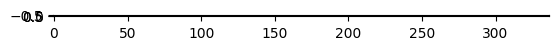

In [20]:
for file_name in file_names:
    numpy_array = jpeg_to_numpy(DIRS_DATASET + file_name)
    grayscale_array = convert_to_grayscale(numpy_array)
    for i in range(13):
        X1.append(grayscale_array)
        X2.append(i)
        y.append(file_name[i])

In [21]:
X1 = np.array(X1)
X2 = np.array(X2)
y = np.array(y, dtype=int)

In [22]:
y

array([4, 5, 1, ..., 5, 8, 4])

In [23]:
# ラベルデータをone-hotベクトルに直す
labels = {
    0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
    6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
    9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
}

y = np.array(list(map(lambda v : labels[v] , y)))

In [24]:
np.set_printoptions(threshold=1000000)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

 ### データの分割

In [25]:
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.8,  # 学習は半分
                  test_size =0.2,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X1))

X1_train, X1_test, X2_train, X2_test = X1[train_index], X1[test_index], X2[train_index], X2[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [26]:
X1

array([[[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]]])

In [27]:
X2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        0,  1,  2,  3,  4

 ### ニューラルネットワークの構築

In [28]:
# 学習し、テストデータで評価し、スコアを表示する
# 引数は、中間層の数、バッチサイズ、epoch数

def fit_epoch(neuron, batch, epochs, X1_train, X1_test, X2_train, X2_test, y_train, y_test):
    
    # レイヤーのオブジェクトを作成
    Dense = keras.layers.Dense



    input1 = keras.layers.Input(shape=(X1_train.shape[1], X1_train.shape[2]))
    input2 = keras.layers.Input(shape=(1,))

    flatten1 = keras.layers.Flatten()(input1)
    concatenated = keras.layers.concatenate([flatten1, input2])
    dense1 = keras.layers.Dense(neuron, activation='relu')(concatenated)
    output = keras.layers.Dense(10, activation='softmax')(dense1)

    model = keras.models.Model(inputs=[input1, input2], outputs=output)

    # モデルを構築
    model.compile(
    loss='categorical_crossentropy',
    optimizer='Adamax',
    metrics=['accuracy'])

    # 学習を実行
    hist = model.fit([X1_train, X2_train], y_train,
        batch_size=batch, # 誤差逆伝播法をするときの1回当たりのデータ数
        epochs=epochs,
        verbose=1,
        validation_data=([X1_test, X2_test], y_test))
    
   # モデルを評価
    score = model.evaluate([X1_test, X2_test], y_test, verbose=1)
    print('正解率=', score[1], 'loss=', score[0])
    
     # 学習の様子をグラフへ描画 
    # 正解率の推移をプロット
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # ロスの推移をプロット
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

Epoch 1/1000
813/813 [==============================] - 2s 2ms/step - loss: 18.8605 - accuracy: 0.1522 - val_loss: 6.1334 - val_accuracy: 0.1878
Epoch 2/1000
813/813 [==============================] - 2s 2ms/step - loss: 7.6108 - accuracy: 0.1546 - val_loss: 8.0002 - val_accuracy: 0.1662
Epoch 3/1000
813/813 [==============================] - 2s 2ms/step - loss: 7.4438 - accuracy: 0.1567 - val_loss: 9.1731 - val_accuracy: 0.1358
Epoch 4/1000
813/813 [==============================] - 2s 2ms/step - loss: 7.5806 - accuracy: 0.1592 - val_loss: 11.7721 - val_accuracy: 0.0898
Epoch 5/1000
813/813 [==============================] - 2s 2ms/step - loss: 6.9788 - accuracy: 0.1654 - val_loss: 5.3007 - val_accuracy: 0.2012
Epoch 6/1000
813/813 [==============================] - 2s 2ms/step - loss: 7.1387 - accuracy: 0.1641 - val_loss: 7.6069 - val_accuracy: 0.1855
Epoch 7/1000
813/813 [==============================] - 2s 2ms/step - loss: 6.5346 - accuracy: 0.1679 - val_loss: 6.5241 - val_accurac

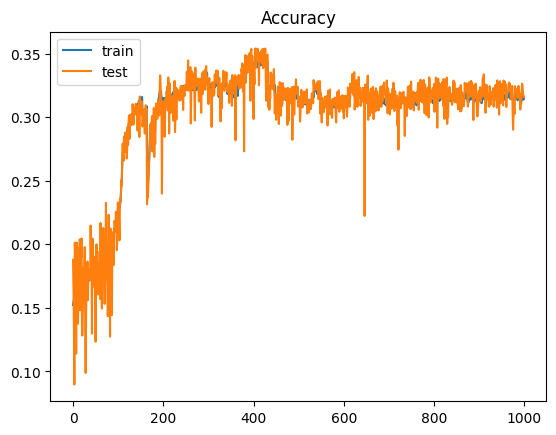

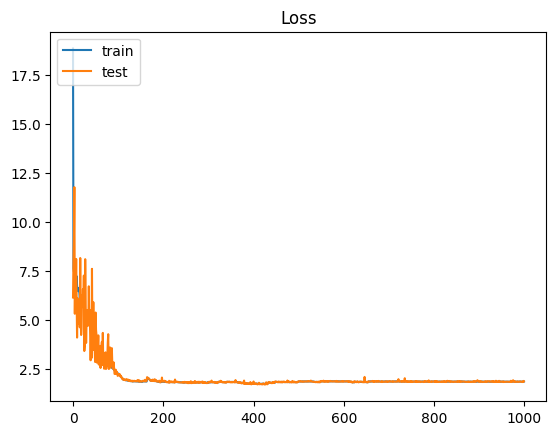

CPU times: total: 4min 53s
Wall time: 38min 59s


In [29]:
%%time
fit_epoch(256,128, 1000, X1_train, X1_test, X2_train, X2_test, y_train, y_test)